In [2]:
import tensorflow as tf

In [3]:

from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd /content/drive/MyDrive/DO_AN_TOT_NGHIEP

/content/drive/MyDrive/DO_AN_TOT_NGHIEP


(35010,)
(10,)
(35010, 50, 50, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 16)          9232      
                                                                 
 max_pooling2d_2 (MaxP

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


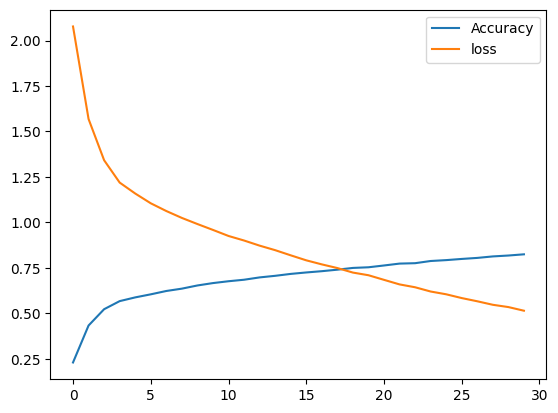

In [5]:

import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential

from keras.layers import Dense
from keras.layers import MaxPooling2D, Conv2D, Flatten
import keras

from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.metrics import confusion_matrix
img_array = []
label_data = np.load("label_data_2.npy")
print(label_data.shape)
label_name = np.load("label_name_2.npy")
print(label_name.shape)
data = np.load("data_2.npy")
print(data.shape)
labelncoder = LabelEncoder()
label_data = labelncoder.fit_transform(label_data)
label_data = to_categorical(label_data, 10)
data = np.load("data_2.npy")
data = np.array(data)
data = data/255

x_train, x_test, y_train, y_test = train_test_split(data, label_data, test_size=0.2, random_state=0)

models = Sequential()
models.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(50,50,3),activation='relu'))
models.add(MaxPooling2D(pool_size=(2,2)))
models.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
models.add(MaxPooling2D(pool_size=(2,2)))
models.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
models.add(MaxPooling2D(pool_size=(2,2)))
models.add(Flatten())
models.add(Dense(512,activation='relu'))
models.add(Dense(10, activation='softmax'))
learning_rate=3e-4
opt = SGD(learning_rate = learning_rate, momentum= 0.9)
models.compile(loss='categorical_crossentropy', metrics=["accuracy"], optimizer= opt)
models.summary()

history = models.fit(x_train, y_train, validation_split= 0.1, epochs=30, batch_size=16)
test_loss, test_accuracy = models.evaluate(x_train, y_train)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
test_loss, test_accuracy = models.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
save_model = models.save("model_new_50.h5")
loss =history.history['loss']


acc =history.history['accuracy']


plt.plot(acc, label = 'Accuracy')

plt.plot(loss, label = 'loss')
plt.legend()
plt.show()

In [7]:
save_model = models.save("model_CNN_2.h5")

confusion_matrix data 2 train

(28008, 50, 50, 3)
(7002, 50, 50, 3)
(28008, 52)
(7002, 52)
876/876 [==============================] - 5s 2ms/step
[[1.1955879e-03 4.6219219e-11 9.6759222e-02 ... 6.4542164e-08
  1.2496699e-04 1.1309557e-04]
 [9.4602508e-03 3.2053132e-02 9.5029362e-02 ... 4.7838525e-03
  1.7809680e-03 1.6853506e-04]
 [3.0969765e-02 7.0161827e-09 3.1850089e-03 ... 1.6685985e-03
  3.3295352e-04 5.2504424e-06]
 ...
 [4.7586248e-03 2.2739845e-03 1.0082577e-02 ... 1.9453273e-06
  1.8801099e-07 2.7383376e-02]
 [3.3237360e-02 5.6129307e-01 3.1445544e-02 ... 2.0094838e-03
  2.8458200e-03 6.4255664e-04]
 [2.0386618e-05 3.3033753e-06 1.2418175e-04 ... 1.4655410e-06
  1.9087672e-07 9.9206990e-01]]
['cantaloupe' 'lemon' 'clementine' ... 'pomelo' 'avocado' 'yali pear']
[['0.0011955879' '4.621922e-11' '0.09675922' ... '6.4542164e-08'
  '0.00012496699' '0.00011309557']
 ['0.009460251' '0.03205313' '0.09502936' ... '0.0047838525'
  '0.001780968' '0.00016853506']
 ['0.030969765' '7.0161827e-09' '0.003185009' ... '0.001

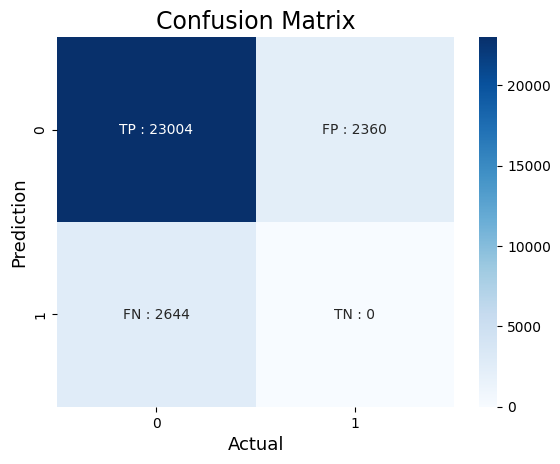

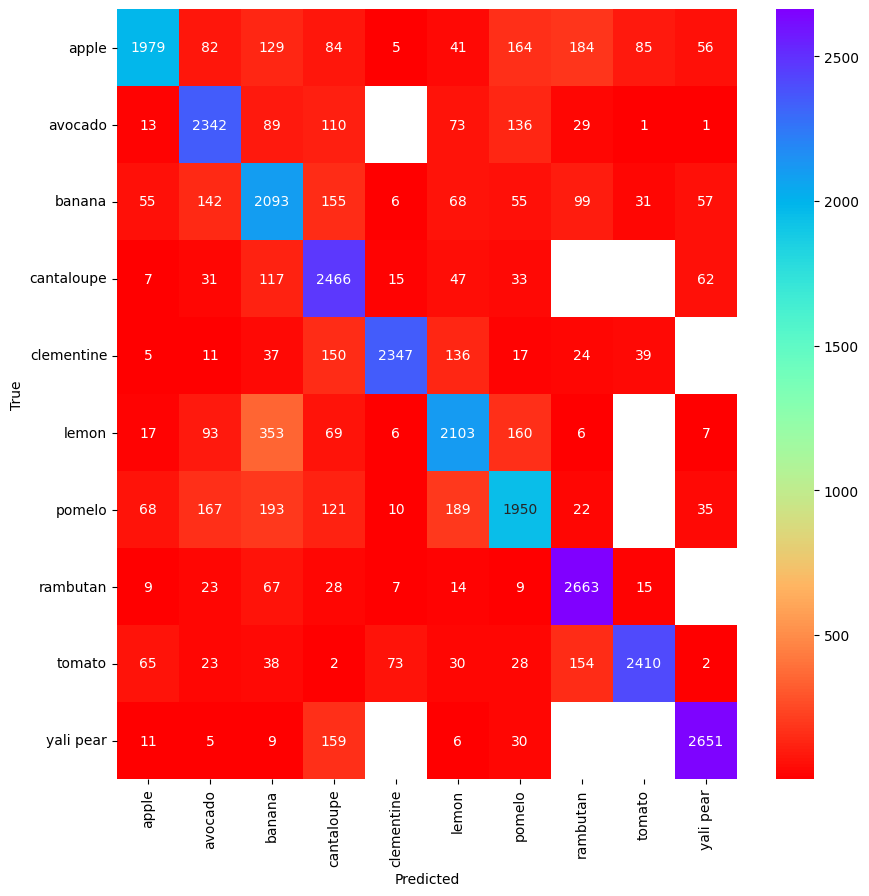

In [5]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
import seaborn as sns
from keras.layers import Dense,Dropout
from keras.layers import MaxPooling2D, Conv2D, Flatten
import keras
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from keras.models import load_model
from tqdm import tqdm

label_data = np.load("label_data_2.npy")

label_name = np.load("label_name_2.npy")

data = np.load("data_2.npy")

labelncoder = LabelEncoder()
label_data = labelncoder.fit_transform(label_data)
label_data = to_categorical(label_data,52)
data = np.load("data_2.npy")
data = np.array(data)
data = data/255

x_train, x_test, y_train, y_test = train_test_split(data, label_data, test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
Label_Actual = x_train.copy()

data_train = Label_Actual / 255
models = load_model("model_CNN_2.h5")
result = models.predict(x_train)
print(result)
predict_label = []

for i in result:
    max_predict = np.argmax(i)
    label_pre = label_name[max_predict]
    predict_label.append(label_pre)

predict_label = np.array(predict_label)
print(predict_label)

Actual_target = []
for j in y_train:
    max_actual = np.argmax(j)
    label_act = label_name[max_actual]
    Actual_target.append(label_act)

ac =y_train.copy()
pre = result.copy()

ac = ac.astype(str)
pre = pre.astype(str)
print(pre)

TP = []
FP = []
FN = []

cm = confusion_matrix(Actual_target, predict_label)
for _ in range(len(cm)):
    for __ in range(len(cm)):
        if  _== __:
            TP.append(cm[_][__])
        if  _!= __:
            if __ > _:
                FP.append(cm[_][__])
        if  _!= __:
            if __ < _:
                FN.append(cm[_][__])


df_cm = pd.DataFrame(cm, index = [i for i in label_name], columns=[i for i in label_name])
mask = cm < 1

TN = 28008 - (np.sum(TP) + np.sum(FP) + np.sum(FN))
print(TN)


data = [[np.sum(TP), np.sum(FP)], [np.sum(FN), TN]]
data = pd.DataFrame(data)
text_labels = np.array([[f"TP : {np.sum(TP)}", f"FP : {np.sum(FP)}"], [f"FN : {np.sum(FN)}", f"TN : {TN}"]])

heatmap = sns.heatmap(data, annot=text_labels, fmt='', cmap='Blues')

plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)

plt.figure(figsize=(10, 10))
sns.heatmap(df_cm, annot=True, cmap="rainbow_r", fmt="d", mask=mask)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


(28008, 50, 50, 3)
(7002, 50, 50, 3)
(28008, 52)
(7002, 52)
219/219 [==============================] - 1s 4ms/step
[[8.57011546e-05 6.55339318e-05 9.51402247e-01 ... 7.36378832e-04
  3.33350508e-05 6.74965895e-06]
 [8.62643272e-02 3.81851965e-03 2.72249766e-02 ... 8.04632623e-03
  5.28841138e-01 1.15583816e-07]
 [5.77186642e-04 1.71260964e-02 1.26413666e-02 ... 1.77741567e-05
  3.79968446e-06 4.90530998e-01]
 ...
 [2.27548997e-03 1.47217056e-02 5.37753403e-01 ... 3.12335952e-03
  8.70758377e-04 2.83918739e-03]
 [6.94106799e-04 2.14137284e-11 6.76950076e-05 ... 6.22944867e-07
  2.45029689e-03 2.23434404e-09]
 [1.94266340e-06 2.97442497e-14 6.91734749e-05 ... 5.27780166e-08
  9.99859333e-01 8.40130357e-17]]
['banana' 'tomato' 'yali pear' ... 'banana' 'clementine' 'tomato']
[['8.5701155e-05' '6.553393e-05' '0.95140225' ... '0.00073637883'
  '3.333505e-05' '6.749659e-06']
 ['0.08626433' '0.0038185196' '0.027224977' ... '0.008046326'
  '0.52884114' '1.15583816e-07']
 ['0.00057718664' '0.017

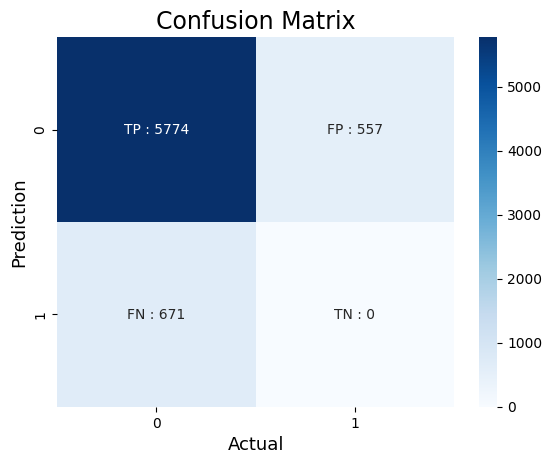

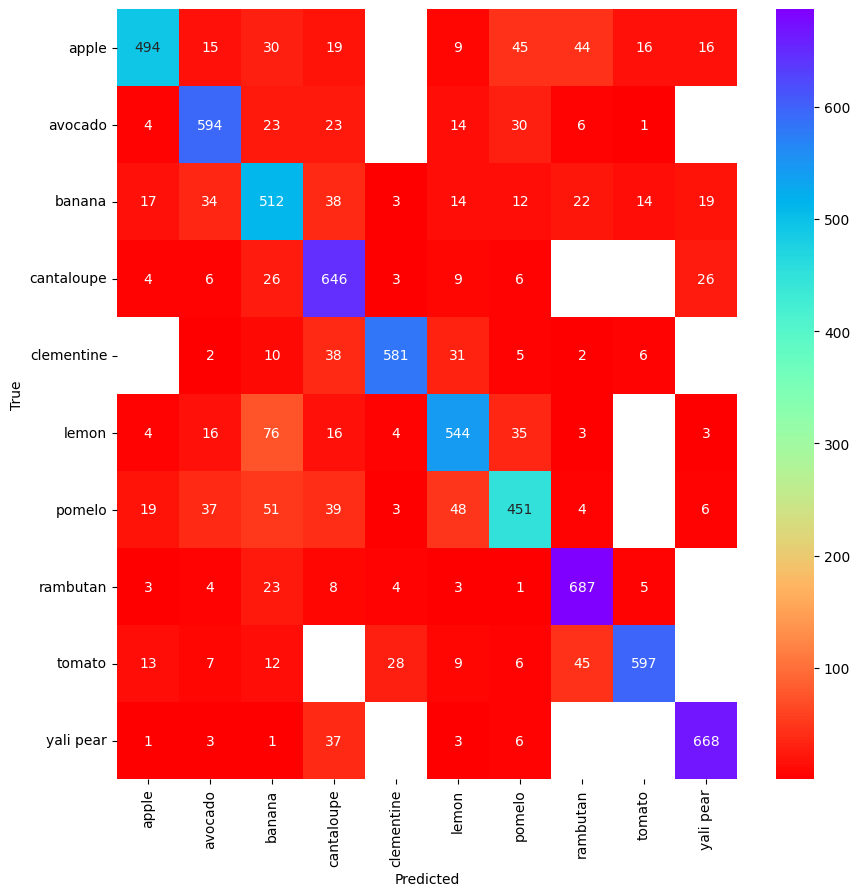

In [6]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
import seaborn as sns
from keras.layers import Dense,Dropout
from keras.layers import MaxPooling2D, Conv2D, Flatten
import keras
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from keras.models import load_model
from tqdm import tqdm

label_data = np.load("label_data_2.npy")

label_name = np.load("label_name_2.npy")

data = np.load("data_2.npy")

labelncoder = LabelEncoder()
label_data = labelncoder.fit_transform(label_data)
label_data = to_categorical(label_data,52)
data = np.load("data_2.npy")
data = np.array(data)
data = data/255

x_train, x_test, y_train, y_test = train_test_split(data, label_data, test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
Label_Actual = x_test.copy()

data_train = Label_Actual / 255
models = load_model("model_CNN_2.h5")
result = models.predict(x_test)
print(result)
predict_label = []

for i in result:
    max_predict = np.argmax(i)
    label_pre = label_name[max_predict]
    predict_label.append(label_pre)

predict_label = np.array(predict_label)
print(predict_label)

Actual_target = []
for j in y_test:
    max_actual = np.argmax(j)
    label_act = label_name[max_actual]
    Actual_target.append(label_act)

ac =y_test.copy()
pre = result.copy()

ac = ac.astype(str)
pre = pre.astype(str)
print(pre)

TP = []
FP = []
FN = []

cm = confusion_matrix(Actual_target, predict_label)
for _ in range(len(cm)):
    for __ in range(len(cm)):
        if  _== __:
            TP.append(cm[_][__])
        if  _!= __:
            if __ > _:
                FP.append(cm[_][__])
        if  _!= __:
            if __ < _:
                FN.append(cm[_][__])


df_cm = pd.DataFrame(cm, index = [i for i in label_name], columns=[i for i in label_name])
mask = cm < 1

TN = 7002 - (np.sum(TP) + np.sum(FP) + np.sum(FN))
print(TN)


data = [[np.sum(TP), np.sum(FP)], [np.sum(FN), TN]]
data = pd.DataFrame(data)
text_labels = np.array([[f"TP : {np.sum(TP)}", f"FP : {np.sum(FP)}"], [f"FN : {np.sum(FN)}", f"TN : {TN}"]])

heatmap = sns.heatmap(data, annot=text_labels, fmt='', cmap='Blues')

plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)

plt.figure(figsize=(10, 10))
sns.heatmap(df_cm, annot=True, cmap="rainbow_r", fmt="d", mask=mask)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
